# Deskripsi _Project_

_Project_ ini termasuk ke dalam kategori **_Supervised Learning_**, yaitu permasalahan klasifikasi teks. Karena data yang digunakan dalam _project_ ini adalah teks, maka _preprocessing_ yang akan dilakukan seperti _preprocessing_ untuk _Natural Language Processing_(NLP). Kemudian, model klasifikasi yang akan digunakan adalah  __**Suport Vector Machine**_ (**SVM**).

# Deskripsi dan Pengumpulan Data

Data yang digunakan merupakan judul-judul berita yang terdapat pada situs resmi [Satgas Penanganan COVID-19 Indonesia](https://covid19.go.id/). Judul-judul berita tersebut di _crawling_, hasilnya disimpan dalam bentuk _file csv_ dan dapat dilihat pada link github [ini](https://github.com/a3x-crypt/indo-covid19-news) (data-v2.csv). Dataset tersebut berjumlah 2486 data dengan dua atribut, yaitu:
1. **Unnamed: 0**: index dataset (int)
2. **text**: Judul berita (String)
3. **hoax**: Keterangan judul berita termasuk _hoax_ atau bukan (int)

# Explorasi Awal

Pada tahapan awal ini akan dilakukan _profiling_ dan beberapa pengecekan terhadap dataset.

In [1]:
# Import library awal
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# news = pd.read_csv('/drive/My Drive/Colabs/Dataset/berita_covid.csv')
news = pd.read_csv('data-v2.csv')
news.head()

,Unnamed: 0,text,hoax
0,0,Senin 27 April 2020 Sumatera Barat Lockdown,1
1,1,Anjuran Berbelanja Ketika Menjalankan “Social ...,0
2,2,Kesembuhan Harian Lampaui Penambahan Kasus Baru,0
3,3,[Top 5] Topik Teratas Periksa Fakta MAFINDO Pe...,1
4,4,Beradaptasi Kebiasaan Baru yang Aman COVID-19 ...,0


In [3]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2496 non-null   int64 
 1   text        2496 non-null   object
 2   hoax        2496 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 58.6+ KB


In [4]:
news.drop(['Unnamed: 0'], inplace=True, axis=1)

In [5]:
news.shape

(2496, 2)

In [6]:
news.head()

,text,hoax
0,Senin 27 April 2020 Sumatera Barat Lockdown,1
1,Anjuran Berbelanja Ketika Menjalankan “Social ...,0
2,Kesembuhan Harian Lampaui Penambahan Kasus Baru,0
3,[Top 5] Topik Teratas Periksa Fakta MAFINDO Pe...,1
4,Beradaptasi Kebiasaan Baru yang Aman COVID-19 ...,0


## Cek Keadaan Kelas

0    1811
1     685
Name: hoax, dtype: int64


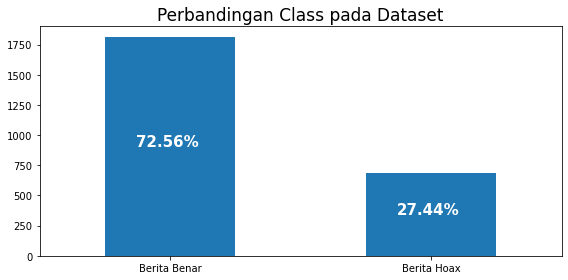

In [7]:
# Cek keadaan kelas
print(news['hoax'].value_counts())

# Plot dengan presentase
fig, ax = plt.subplots(figsize=(8,4))
name = ['Berita Benar', 'Berita Hoax']
ax = news['hoax'].value_counts().plot(kind='bar')
ax.set_title('Perbandingan Class pada Dataset', fontsize = 17)
ax.set_xticklabels (name, rotation = 0)

# menghitung presentase
totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:  
  ax.text(i.get_x()+0.12, i.get_height()-i.get_height()/2, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
          color='white', weight = 'bold')    
plt.tight_layout()

> Dari grafik terlihat dataset _**imbalance**_. Hal ini mungkin dapat menyebabkan _metric_ pengukuran hasil klasifikasi seperti akurasi, presisi, _recall_, dan _f1-score_ tidak imbang. Mungkin salah satu atau beberapa _metric_ tersebut ada yang tinggi dan yang lainnya rendah.

## Cek Panjang Judul dan Jumlah Kata Dalam Judul Berita

In [8]:
# Menghitung panjang judul berita dan jumlah kata pada setiap judul berita
news['panjang_judul'] = news['text'].astype(str).apply(len)
news['jml_kata'] = news['text'].apply(lambda x: len(str(x).split()))
news.head()

,text,hoax,panjang_judul,jml_kata
0,Senin 27 April 2020 Sumatera Barat Lockdown,1,43,7
1,Anjuran Berbelanja Ketika Menjalankan “Social ...,0,57,6
2,Kesembuhan Harian Lampaui Penambahan Kasus Baru,0,47,6
3,[Top 5] Topik Teratas Periksa Fakta MAFINDO Pe...,1,73,12
4,Beradaptasi Kebiasaan Baru yang Aman COVID-19 ...,0,59,8


<AxesSubplot:xlabel='panjang_judul', ylabel='Count'>

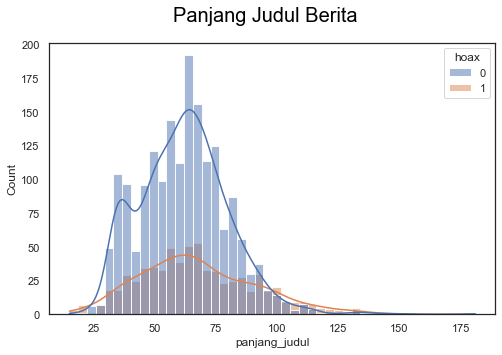

In [9]:
# Plot panjang judul berita
plt.figure(figsize=(8,5))
plt.suptitle('Panjang Judul Berita', fontsize=20)
plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

sns.set(rc={'figure.figsize':(12,8)}, style='white')
sns.histplot(data=news, x='panjang_judul', hue='hoax', kde=True)

> Dari grafik, distribusi panjang judul berita untuk berita hoax dan yang tidak memiliki kemiripan. Artinya, sulit untuk membedakan suatu berita termasuk _hoax_ atau tidak berdasarkan panjang judul beritanya.

<AxesSubplot:xlabel='jml_kata', ylabel='Count'>

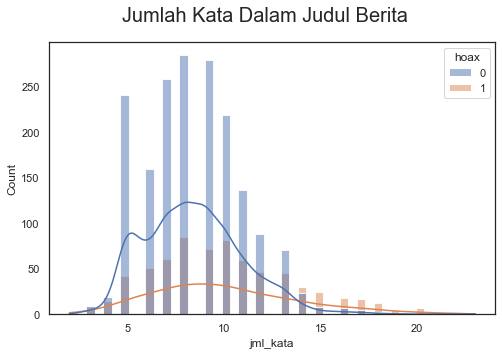

In [10]:
# Plot Jumlah kata dalam judul berita
plt.figure(figsize=(8,5))
plt.suptitle('Jumlah Kata Dalam Judul Berita', fontsize=20)
plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

sns.set(rc={'figure.figsize':(12,8)}, style='white')
sns.histplot(data=news, x='jml_kata', hue='hoax', kde=True)

> Dari grafik, secara umum distribusi jumlah kata dalam berita untuk berita _hoax_ dan tidak sama. Namun, untuk berita dengan **jumlah kata >= 15** cenderung mengarah ke _**hoax**_.

# _Preprocessing_ Data

Pada tahap ini akan dilakukan beberapa _step_ untuk pemrosesan awal data yang mengacu pada _preprocessing_ untuk _nlp_. Karena data awal yang berupa teks tidak dapat dipahami langsung oleh komputer untuk diproses.

In [11]:
!pip install Sastrawi

In [12]:
# import beberapa libarary awal untuk prepprocessing
import string
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

## _Case Folding_

_Step_ ini untuk mengubah teks menjadi seragam, semuanya teks dikonversi ke huruf kecil (_lower case_). Selain itu, spasi berlebih juga dihilangkan.

In [13]:
news['text'] = news['text'].str.lower()
news['text'] = news['text'].str.strip()
news.head()

,text,hoax,panjang_judul,jml_kata
0,senin 27 april 2020 sumatera barat lockdown,1,43,7
1,anjuran berbelanja ketika menjalankan “social ...,0,57,6
2,kesembuhan harian lampaui penambahan kasus baru,0,47,6
3,[top 5] topik teratas periksa fakta mafindo pe...,1,73,12
4,beradaptasi kebiasaan baru yang aman covid-19 ...,0,59,8


## _Text Cleaning_

_Step_ ini untuk membersihkan teks dari tanda baca (termasuk angka-angka). Jadi, data yang akan digunakan pada model benar-benar murni hanya teks data.

In [14]:
# membuat fungsi untuk membersihkan teks
def bersihin_teks(teks):  
    teks = re.sub('-', ' ', teks) 
    teks = re.sub(r"\d+", "", teks) # menghapus angka
    teks = teks.translate(str.maketrans("","",string.punctuation)) # menghapus tanda baca  
    teks = re.sub('“', '', teks) # menghapus quotes yang masih terdapat dalam teks
    teks = re.sub('”', '', teks) 
    return teks

In [15]:
news['text'] = news['text'].apply(lambda x: bersihin_teks(x))
news.head(10)

,text,hoax,panjang_judul,jml_kata
0,senin april sumatera barat lockdown,1,43,7
1,anjuran berbelanja ketika menjalankan social d...,0,57,6
2,kesembuhan harian lampaui penambahan kasus baru,0,47,6
3,top topik teratas periksa fakta mafindo perio...,1,73,12
4,beradaptasi kebiasaan baru yang aman covid da...,0,59,8
5,lonjakan kasus dampak abaikan protokol kesehatan,0,48,6
6,awas hati hati apa yang disemprotkan fpi adala...,1,60,9
7,infografis covid september,0,39,5
8,kandidat vaksin covid di indonesia cepat mand...,0,65,9
9,infografis covid agustus,0,37,5


In [16]:
news.iloc[1,0]

'anjuran berbelanja ketika menjalankan social distancing'

> Dari hasil _text cleaning_ terlihat teks sudah seragam dalam bentuk _lower case_ dan sudah bersih.

## _Stopwords Removing_

Pada _step_ ini akan membersikah teks dari kata-kata yang sering muncul dalam jumlah besar dan dianggap tidak memiliki makna. Akan digunakan _stopwords_ dari library **Sastrawi** sama **NLTK**. Keterangan jumlah _stopwords_ kata-katanya juga akan ditampilkan di bawah.
Ada kemungkinan masih ada _stopwords_ yang belum _tercover_, seperti kata yang **_typo_**. Untuk itu, kata-kata tersebut akan dihapus secara manual menggunakan fungsi ***rem_stopwords*** yang akan didefinisikan di bawah.

In [17]:
# Stopwords dari NLTK
# nltk.download('stopwords')
from nltk.corpus import stopwords
print('Jumlah stopwords dari NLTK: ', len(stopwords.words('indonesian')), '\n', stopwords.words('indonesian'))

Jumlah stopwords dari NLTK:  758 
 ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berk

In [18]:
news['text'] = news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('indonesian'))]))

In [19]:
# stopwords dari Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize

In [20]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print('Jumlah stopwords dari Sastrawi: ', len(stopwords), '\n', stopwords)

Jumlah stopwords dari Sastrawi:  126 
 ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', '

In [21]:
stopwords = factory.create_stop_word_remover()
news['text'] = pd.DataFrame(news['text'].apply(lambda x: stopwords.remove(x)))
news.head(10)

,text,hoax,panjang_judul,jml_kata
0,senin april sumatera barat lockdown,1,43,7
1,anjuran berbelanja menjalankan social distancing,0,57,6
2,kesembuhan harian lampaui penambahan,0,47,6
3,top topik teratas periksa fakta mafindo period...,1,73,12
4,beradaptasi kebiasaan aman covid produktif,0,59,8
5,lonjakan dampak abaikan protokol kesehatan,0,48,6
6,awas hati hati disemprotkan fpi virus corona,1,60,9
7,infografis covid september,0,39,5
8,kandidat vaksin covid indonesia cepat mandiri ...,0,65,9
9,infografis covid agustus,0,37,5


In [22]:
# fungsi untuk menghapus tambahan kata (typo) dalam teks
def rem_stopwords(teks):  
    list_kata = [' ga ', ' nya ', ' pake ', ' sdh ', ' yg ', ' eua ', ' aa ',
                 ' adeku', ' aja ', ' ajah ', ' al ', ' alegre ', ' alurjkt' , 
                 ' ar' , ' aseng ', ' bebaaassss ', ' byk ', ' cahu ', ' covit ', 
                 ' dengernya ', ' dgn' , ' didalam ', ' didunia ', ' dlm ', ' fatwah ', 
                 ' fuul ', ' gabener ', ' gabenernya ', ' gak ', ' gg ', ' insetif ', ' jd' , 
                 ' jgn' , ' jk ', ' jt ', ' karna ', ' knp ', ' konstribusi ', ' krn ', ' lagii ', 
                 ' lg ', ' liburann ', ' kuwalahan ', ' makasih ', ' malem ', ' malesiya ', 
                 ' mangkin ', ' masukk ', ' masyakarat ', ' mencanlonkan ']
    for i in list_kata:
        teks = re.sub(i,' ', teks)
        teks = teks.strip()  
    return teks

In [23]:
news['text'] = news['text'].apply(lambda x: rem_stopwords(x))
news['text'] = news['text'].str.strip()
news.head(10)

,text,hoax,panjang_judul,jml_kata
0,senin april sumatera barat lockdown,1,43,7
1,anjuran berbelanja menjalankan social distancing,0,57,6
2,kesembuhan harian lampaui penambahan,0,47,6
3,top topik teratas periksa fakta mafindo period...,1,73,12
4,beradaptasi kebiasaan aman covid produktif,0,59,8
5,lonjakan dampak abaikan protokol kesehatan,0,48,6
6,awas hati hati disemprotkan fpi virus corona,1,60,9
7,infografis covid september,0,39,5
8,kandidat vaksin covid indonesia cepat mandiri ...,0,65,9
9,infografis covid agustus,0,37,5


## _Tokenizing_

_Step_ ini akan memecah suatu kalimat menjadi kata-kata. Kemudian pada _step_ ini juga akan perhitungan _n-gram_ dan visualisasinya untuk n=1,2,3,4. **"_n-gram_"** sendiri dalam bidang linguistik dan probabilitas komputasi adalah urutan n item yang berdekatan dari sampel teks atau ucapan tertentu. Item tersebut bisa berupa fonem, suku kata, huruf, kata atau pasangan basa sesuai dengan aplikasi.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

c_vec_1 = CountVectorizer(ngram_range=(1,1))
c_vec_2 = CountVectorizer(ngram_range=(2,2))
c_vec_3 = CountVectorizer(ngram_range=(3,3))
c_vec_4 = CountVectorizer(ngram_range=(4,4))

# matrix dari ngrams
news_ngrams = news['text']
ngrams_1 = c_vec_1.fit_transform(news_ngrams)
ngrams_2 = c_vec_2.fit_transform(news_ngrams)
ngrams_3 = c_vec_3.fit_transform(news_ngrams)
ngrams_4 = c_vec_4.fit_transform(news_ngrams)

# menghitung frekuensi dari ngrams
count_values_1 = ngrams_1.toarray().sum(axis=0)
count_values_2 = ngrams_2.toarray().sum(axis=0)
count_values_3 = ngrams_3.toarray().sum(axis=0)
count_values_4 = ngrams_4.toarray().sum(axis=0)

# list dataframe ngrams
vocab_1 = c_vec_1.vocabulary_
news_unigram = pd.DataFrame(sorted([(count_values_1[i],k) for k,i in vocab_1.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram'})

vocab_2 = c_vec_2.vocabulary_
news_bigram = pd.DataFrame(sorted([(count_values_2[i],k) for k,i in vocab_2.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

vocab_3 = c_vec_3.vocabulary_
news_trigram = pd.DataFrame(sorted([(count_values_3[i],k) for k,i in vocab_3.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

vocab_4 = c_vec_4.vocabulary_
news_4gram = pd.DataFrame(sorted([(count_values_4[i],k) for k,i in vocab_4.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'4gram'})

In [25]:
print(len(news_unigram), len(news_bigram), len(news_trigram), len(news_4gram))
news_unigram.head(), news_bigram.head(), news_trigram.head(), news_4gram.head()

3807 9200 9562 8027


(   frequency     unigram
 0       1346       covid
 1        255      vaksin
 2        246      pasien
 3        188      sembuh
 4        176  infografis,
    frequency            bigram
 0        176  infografis covid
 1        149     pasien sembuh
 2        106      vaksin covid
 3         94  penanganan covid
 4         88     pandemi covid,
    frequency                trigram
 0         68    pasien sembuh covid
 1         30   infografis covid mei
 2         29  infografis covid juni
 3         29  infografis covid juli
 4         27   data covid indonesia,
    frequency                          4gram
 0         26    data covid indonesia update
 1         26  analisis data covid indonesia
 2         25  pasien sembuh covid bertambah
 3         17   sembuh covid bertambah orang
 4          8    topik teratas periksa fakta)

Text(0.5, 1.0, 'Top-20 Unigram')

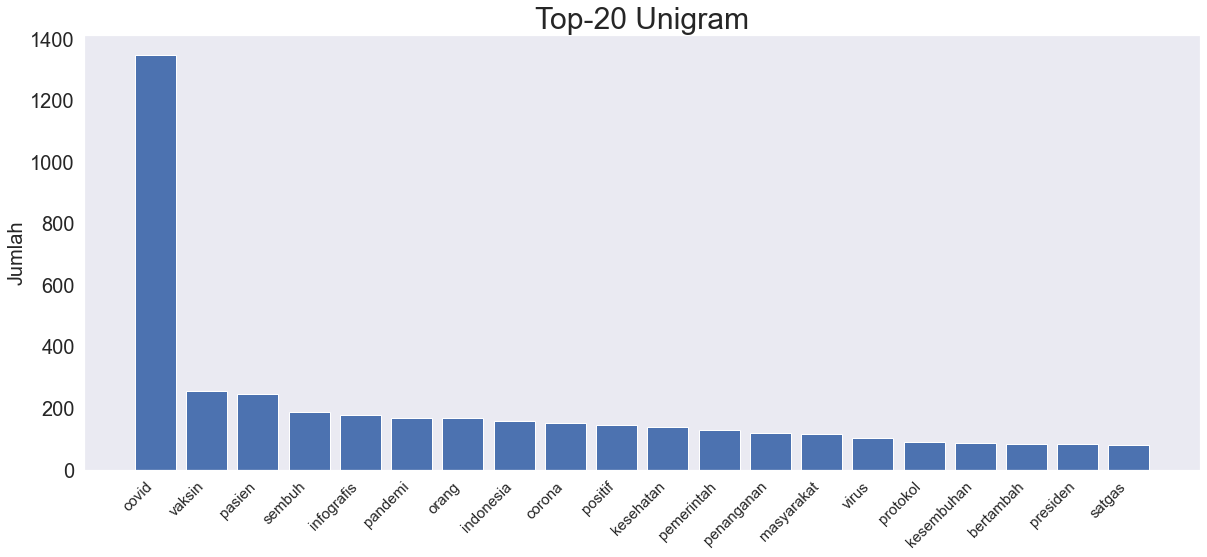

In [26]:
# Plot Top-20 Unigram
sns.set(rc={'figure.figsize':(20,8)}, style='dark')
x = [news_unigram.iloc[i,1] for i in range(20)]
y = [news_unigram.iloc[i,0] for i in range(20)]
plt.bar(x,y,align='center')
plt.xticks(rotation='45', fontsize=15, ha='right')
plt.yticks(fontsize=20, ha='right')
plt.ylabel('Jumlah', fontsize=20)
plt.title('Top-20 Unigram', fontsize=30)

Text(0.5, 1.0, 'Top-20 Bigram')

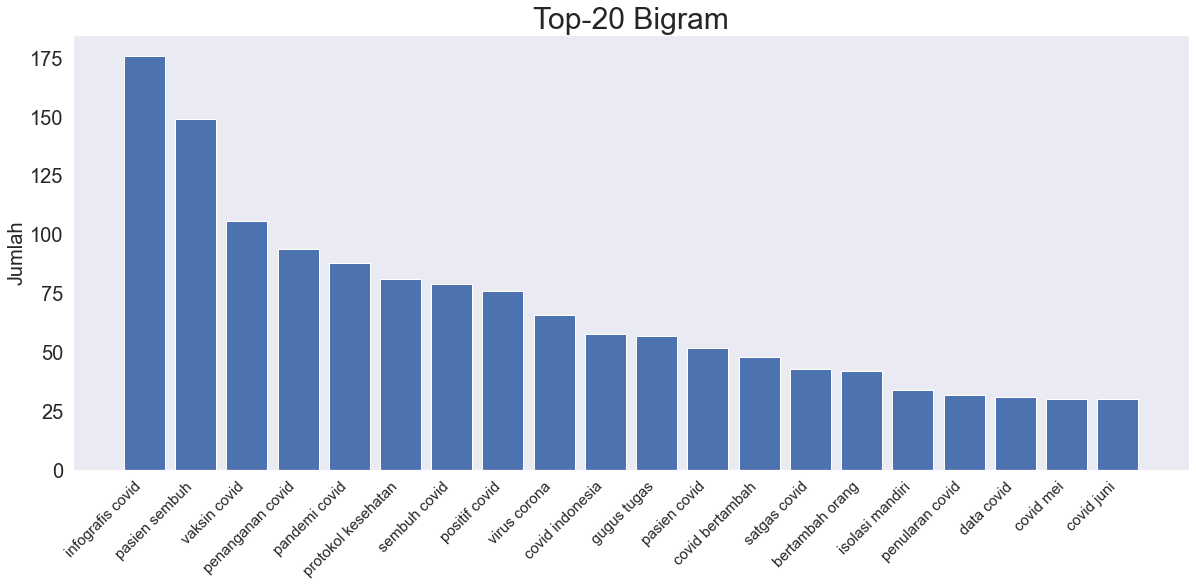

In [27]:
# Plot Top-20 Bigram
sns.set(rc={'figure.figsize':(20,8)}, style='dark')
x = [news_bigram.iloc[i,1] for i in range(20)]
y = [news_bigram.iloc[i,0] for i in range(20)]
plt.bar(x,y,align='center')
plt.xticks(rotation='45', fontsize=15, ha='right')
plt.yticks(fontsize=20, ha='right')
plt.ylabel('Jumlah', fontsize=20)
plt.title('Top-20 Bigram', fontsize=30)

Text(0.5, 1.0, 'Top-20 Trigram')

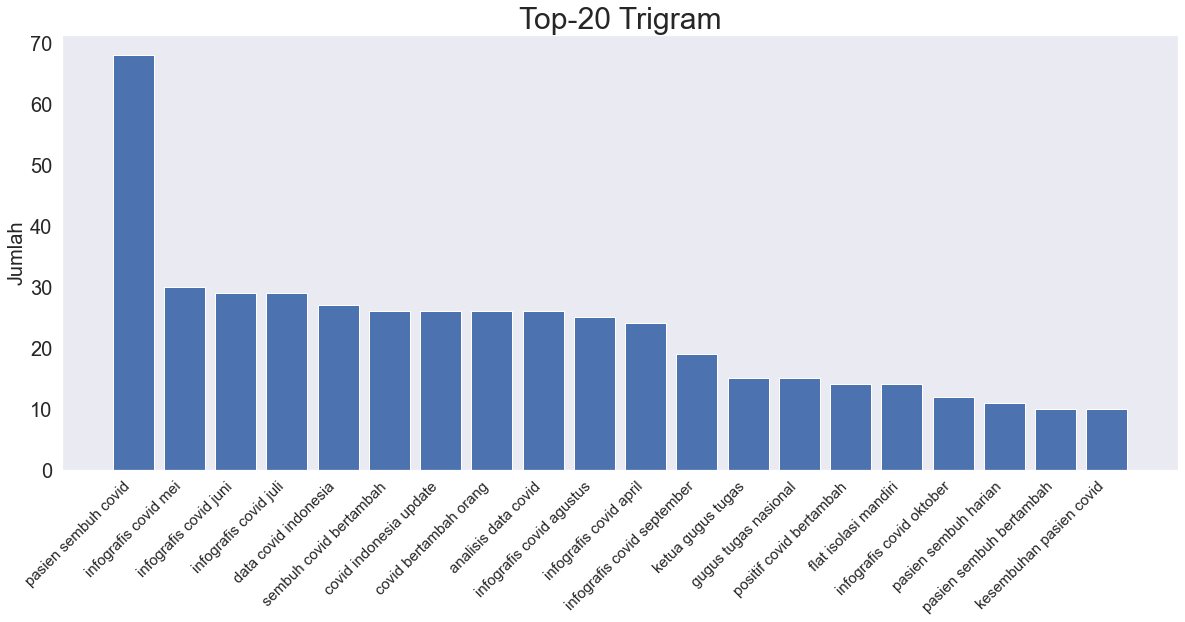

In [28]:
# Plot Top-20 Trigram
sns.set(rc={'figure.figsize':(20,8)}, style='dark')
x = [news_trigram.iloc[i,1] for i in range(20)]
y = [news_trigram.iloc[i,0] for i in range(20)]
plt.bar(x,y,align='center')
plt.xticks(rotation='45', fontsize=15, ha='right')
plt.yticks(fontsize=20, ha='right')
plt.ylabel('Jumlah', fontsize=20)
plt.title('Top-20 Trigram', fontsize=30)

Text(0.5, 1.0, 'Top-20 4gram')

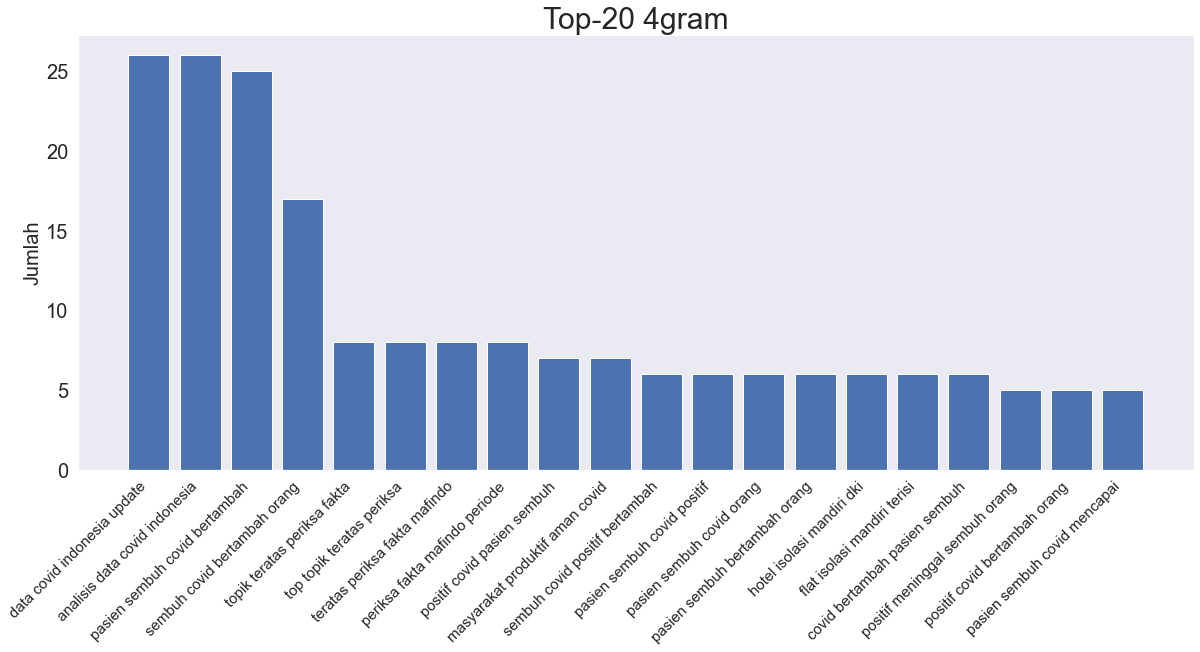

In [29]:
# Plot Top-20 4gram
sns.set(rc={'figure.figsize':(20,8)}, style='dark')
x = [news_4gram.iloc[i,1] for i in range(20)]
y = [news_4gram.iloc[i,0] for i in range(20)]
plt.bar(x,y,align='center')
plt.xticks(rotation='45', fontsize=15, ha='right')
plt.yticks(fontsize=20, ha='right')
plt.ylabel('Jumlah', fontsize=20)
plt.title('Top-20 4gram', fontsize=30)

## _Stemming_

_Stemming_ untuk mengambil kata dasar dari sebuah kata. Untuk yang bahasa Indonesia, di sini akan menggunakan dari library **Sastrawi**, karena untuk **NLTK** belum _support_ untuk bahasa Indonesia.

In [30]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

In [31]:
# copy dataset asli untuk melihat perbandingan antara data teks yang sudah distemming dan yang tidak
news_stem = news.copy()
news_stem['text'] = pd.DataFrame(news_stem['text'].apply(lambda x: stemmer.stem(x)))
news_stem.head()

,text,hoax,panjang_judul,jml_kata
0,senin april sumatera barat lockdown,1,43,7
1,anjur belanja jalan social distancing,0,57,6
2,sembuh hari lampau tambah,0,47,6
3,top topik atas periksa fakta mafindo periode m...,1,73,12
4,adaptasi biasa aman covid produktif,0,59,8


In [32]:
news.head()

,text,hoax,panjang_judul,jml_kata
0,senin april sumatera barat lockdown,1,43,7
1,anjuran berbelanja menjalankan social distancing,0,57,6
2,kesembuhan harian lampaui penambahan,0,47,6
3,top topik teratas periksa fakta mafindo period...,1,73,12
4,beradaptasi kebiasaan aman covid produktif,0,59,8


### Cek Top-20 Unigram setelah _Stemming_

Text(0.5, 1.0, 'Top-20 Unigram Setelah Stemming')

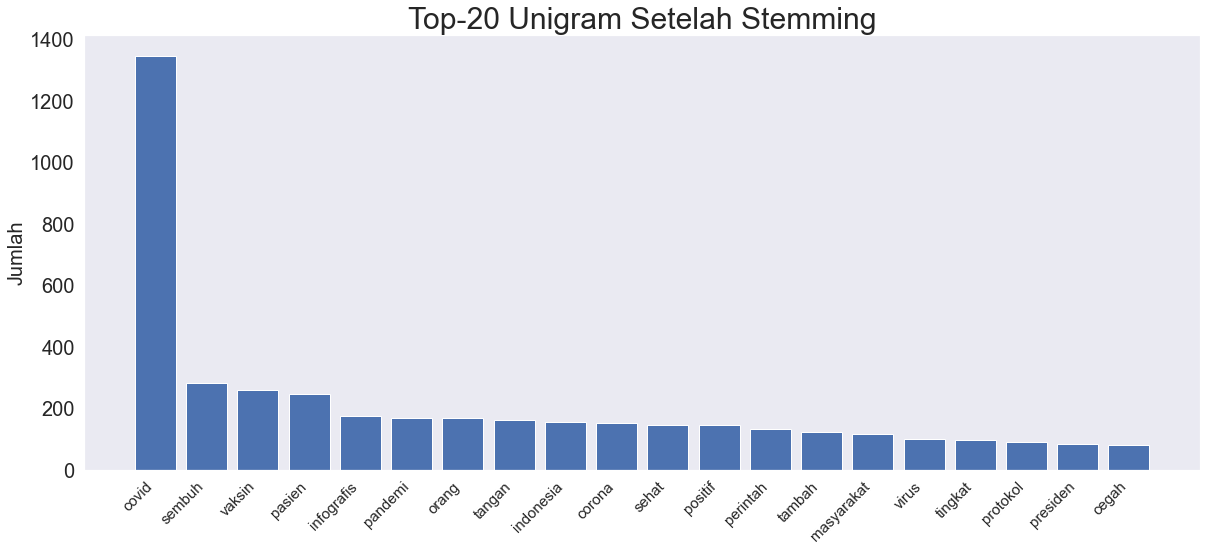

In [33]:
c_vec_1 = CountVectorizer(ngram_range=(1,1))

# matrix dari ngrams
news_ngrams_stem = news_stem['text']
ngrams_1_stem = c_vec_1.fit_transform(news_ngrams_stem)

# menghitung frekuensi dari ngrams
count_values_1_stem = ngrams_1_stem.toarray().sum(axis=0)

# list dataframe ngrams
vocab_1_stem = c_vec_1.vocabulary_
news_unigram_stem = pd.DataFrame(sorted([(count_values_1_stem[i],k) for k,i in vocab_1_stem.items()], reverse=True)
            ).rename(columns={0: 'frekuensi', 1:'unigram'})

# Plotting
sns.set(rc={'figure.figsize':(20,8)}, style='dark')
x = [news_unigram_stem.iloc[i,1] for i in range(20)]
top_unigram_stem_col = x
y = [news_unigram_stem.iloc[i,0] for i in range(20)]
plt.bar(x,y,align='center')
plt.xticks(rotation='45', fontsize=15, ha='right')
plt.yticks(fontsize=20, ha='right')
plt.ylabel('Jumlah', fontsize=20)
plt.title('Top-20 Unigram Setelah Stemming', fontsize=30)

## _One Hot Encoding_

Pada _step_ ini agar lebih efisien kata-kata dalam judul beritanya dibuat unik dahulu baru dilakukan _one hot encoding_.

In [34]:
# fungsi untuk membuat kata-kata dalam judul menjadi unik
def jadikan_unik(kata):
    kata = kata.split()
    unik = []
    for word in kata:
        if word not in unik:
            unik.append(word)
    sep = ' '
    kata = sep.join(unik)
    return kata

In [35]:
print('sampel sebelum: ')
# data_dtm.iloc[1593:1597,2980:2990]
print(news['text'].iloc[1595])

sampel sebelum: 
pesan berantai peringatan orang pintu pintu membagikan masker


In [36]:
news_stem['text'] = pd.DataFrame(news_stem['text'].apply(lambda x: jadikan_unik(x)))
news['text'] = pd.DataFrame(news['text'].apply(lambda x: jadikan_unik(x)))
news_stem['text'] = news_stem['text'].str.strip()
news['text'] = news['text'].str.strip()

In [37]:
print('sampel sesudah: ')
# data_dtm.iloc[1593:1597,2980:2990]
print(news['text'].iloc[1595])

sampel sesudah: 
pesan berantai peringatan orang pintu membagikan masker


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data_cv = cv.fit_transform(news['text'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = news['text'].index
data_dtm.head()

,aadc,aamiin,aamir,ab,abai,abaikan,abang,abdul,aborsi,about,...,yustisi,yusuf,zakat,zat,zero,zimbabwe,zinc,zithromax,zona,zonasi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
cv_stem = CountVectorizer()
data_cv_stem = cv_stem.fit_transform(news_stem['text'])
data_dtm_stem = pd.DataFrame(data_cv_stem.toarray(), columns=cv_stem.get_feature_names())
data_dtm_stem.index = news_stem['text'].index

In [101]:
data_dtm_stem.sample(10)

,aadc,aamiin,aamir,ab,abai,abang,abdi,abdul,aborsi,about,...,yusuf,zakat,zalim,zat,zero,zimbabwe,zinc,zithromax,zona,zonasi
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
print('Total kata dari dataset yang gak distemming ada', data_dtm.shape[1], ', ini kata-katanya:\n')
for i in range(data_dtm.shape[1]):
    print(data_dtm.columns[i], end=', ')
    if i%100 == 0 and i != 0:
        print('\n')

Total kata dari dataset yang gak distemming ada 3807 , ini kata-katanya:

aadc, aamiin, aamir, ab, abai, abaikan, abang, abdul, aborsi, about, abu, acap, acara, aceh, achmad, ad, adakan, adaptasi, adaptif, adat, ade, adeku, adha, adidas, administrasi, afrika, agama, agen, agresif, agustus, agustusan, ah, ahan, ahli, ahmad, ahok, air, airin, airlangga, aja, ajah, ajak, ajaran, ajarkan, ajukan, akademi, akb, akhirat, akibat, akronim, akselerasi, akses, aksi, aktif, aktivis, aktivitas, aktor, aktris, akui, akun, akuntabel, akurat, ala, alam, alami, alat, alfamart, alhamdulillah, ali, aliansi, alirkan, alkali, alkes, alkohol, allah, allergy, alm, almatkes, alokasikan, alternatif, alumunium, alur, amal, aman, amankan, amati, ambil, ambon, ambulans, amerika, amin, amoxilin, ampuh, ampulan, amunisi, an, anak, anaknya, analis, analisa, analisis, 

ancaman, and, andalan, andalkan, andil, andre, anggap, anggaran, anggota, angin, angka, angkatan, angsuran, anies, animasi, anjing, anjlok, anjuran,

hikmah, hilang, hilangkan, hilirisasi, himbau, himbauan, hindari, hindu, hipoksia, hirup, hitam, hj, hk, hkmenkes, hoaks, hoax, honjo, honorer, hospitals, hotel, hotman, hri, hujan, hukum, hukuman, humanis, hunian, husna, hussein, hut, hutan, hutang, hydro, hydroxychloroquine, ibadah, ibadat, ibukota, icp, icu, idaho, identification, identifikasi, idi, idul, idulfitri, iel, ifin, iftar, ii, iii, ikan, ikappi, ikhlas, ikhlaskan, iklan, ikuti, il, ilmuwan, imam, iman, imbau, imbauan, imigran, immunity, implan, implementasi, implementasikan, imported, imun, imunisasi, imunitas, in, inalilahi, inap, inarisk, india, indikator, individu, indon, indonesia, indro, industri, infectious, infeksi, influencer, info, infobpjstku, infodemik, infodotcrayondotworld, infografis, informasi, informs, infovaksin, infrastruktur, ingatkan, inggris, ini, inisiatif, innalillahi, inovasi, 

insentif, insidensi, instagram, instan, institusi, institut, institute, instituto, instruksi, instruksikan, insya, intell

parameter, parepare, paris, pariwisata, partisipasi, paru, pasar, pasca, pascapanen, pasien, paska, paskah, passport, pastikan, pasukan, pasuruan, patients, patuh, patuhi, patung, paus, pbb, pbnu, pcpen, pcr, pd, pdip, pdp, pdskji, pdtt, pecah, pedagang, pedangdut, pedoman, peduli, pedulilindungi, pegawai, pegiat, pejuang, pekalongan, pekan, pekerja, pekerjaan, pelabuhan, pelacakan, pelajaran, pelaksanaan, pelaku, pelanggan, pelanggar, pelaporan, pelarangan, pelatih, pelatihan, pelawak, pelayanan, pelindung, pelni, pelonggaran, pelosok, peluang, peluangnya, peluncuran, pemahaman, pemakaian, pemakaman, pemanfaatan, pemangku, pemasangan, pembagian, pembakaran, pembalakan, pembantu, pembatasan, pembayaran, pembebasan, pembela, pembelajaran, pemberian, pemberitaan, pemberlakuan, pemberlakukan, pembesaran, pembinaan, pemboikotan, pembuangan, pembuat, pembuatan, pembubaran, pembukaan, pembuktian, pembunuh, pembunuhan, pemda, pemenang, pemenuhan, pemerataan, pemeriksaan, pemeringkatan, pemeri

In [41]:
print('Total kata dari dataset yang distemming ada', data_dtm_stem.shape[1], ', ini kata-katanya:\n')
for i in range(data_dtm_stem.shape[1]):
    print(data_dtm_stem.columns[i], end=', ')
    if i%100 == 0 and i != 0:
        print('\n')

Total kata dari dataset yang distemming ada 2961 , ini kata-katanya:

aadc, aamiin, aamir, ab, abai, abang, abdi, abdul, aborsi, about, abu, acap, acara, aceh, achmad, ad, ada, adakan, adaptasi, adaptif, adat, ade, adeku, adha, adidas, administrasi, adopsi, adu, afrika, agam, agama, agen, agresif, agustus, ah, ahan, ahli, ahmad, ahok, air, airin, airlangga, aja, ajah, ajak, ajar, aju, akademi, akb, akhirat, akibat, akronim, akselerasi, akses, aksi, aktif, aktivis, aktivitas, aktor, aktris, aku, akun, akuntabel, akurat, ala, alam, alami, alat, alfamart, alhamdulillah, ali, aliansi, alih, alir, alkali, alkes, alkohol, allah, allergy, alm, almatkes, alokasi, alternatif, alumunium, alun, alur, amal, aman, amat, ambil, ambon, ambulans, amerika, amin, amoxilin, ampo, ampuh, ampul, amuk, amunisi, an, 

anak, analis, analisa, analisis, ancam, and, andal, andil, andre, anggap, anggar, anggota, angin, angka, angkat, angsur, anies, animasi, anjing, anjlok, anjur, anna, annisa, announces, antariks

luwu, ma, maatje, madu, madura, mafindo, magnis, magrib, mahal, mahasiswa, mahfoudz, main, majalah, majelis, maju, makam, makan, makassar, maklumat, makna, maksimal, maktoum, mal, malaikat, malam, malang, malaysia, malem, mall, malu, malut, mamah, maman, mampu, manado, manaf, manager, manah, manajemen, manajer, mandiri, mandul, manfaat, mang, manggarai, mangkuhui, manipulasi, manjur, manny, mantan, manusia, mara, maret, maria, mark, markas, market, mars, maruf, masak, masalah, masif, masjid, masjidil, masker, maskeruntuksemua, mass, massa, massal, masuk, masuukk, masyakarat, masyarakat, mata, matahari, matang, matarantai, material, mati, mau, maulana, mayat, mayestik, mayjen, mayor, mayoritas, mb, mbah, medan, media, medical, medis, medsos, mei, mekah, mekanisme, meksiko, melinda, menag, menaker, 

menang, menara, mendagri, mendikbud, menep, mengatasnamakan, menggrebek, menghadang, menghimbau, menhan, menhub, meni, meninggalhrsdi, menit, menkes, menko, menristek, menristekkepala, menso

wamenlu, wameo, wanita, wapres, warga, waris, warna, warning, wartawan, waspada, wave, webinar, website, wenang, wfh, whatsapp, who, widodo, wiku, wilayah, windusari, wirausahawan, wisata, wisatawan, wisma, wisuda, with, wn, wna, wni, workshop, world, wrapped, wudhu, wuhan, wujud, xi, xxi, yahudi, yahya, yakin, yogya, yogyakarta, york, yos, yuk, yunita, yuri, yurianto, yustisi, yusuf, zakat, zalim, zat, zero, zimbabwe, zinc, zithromax, zona, zonasi, 

<ipython-input-42-4da91317795f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korelasi_unigram['hoax_label'] = news['hoax']


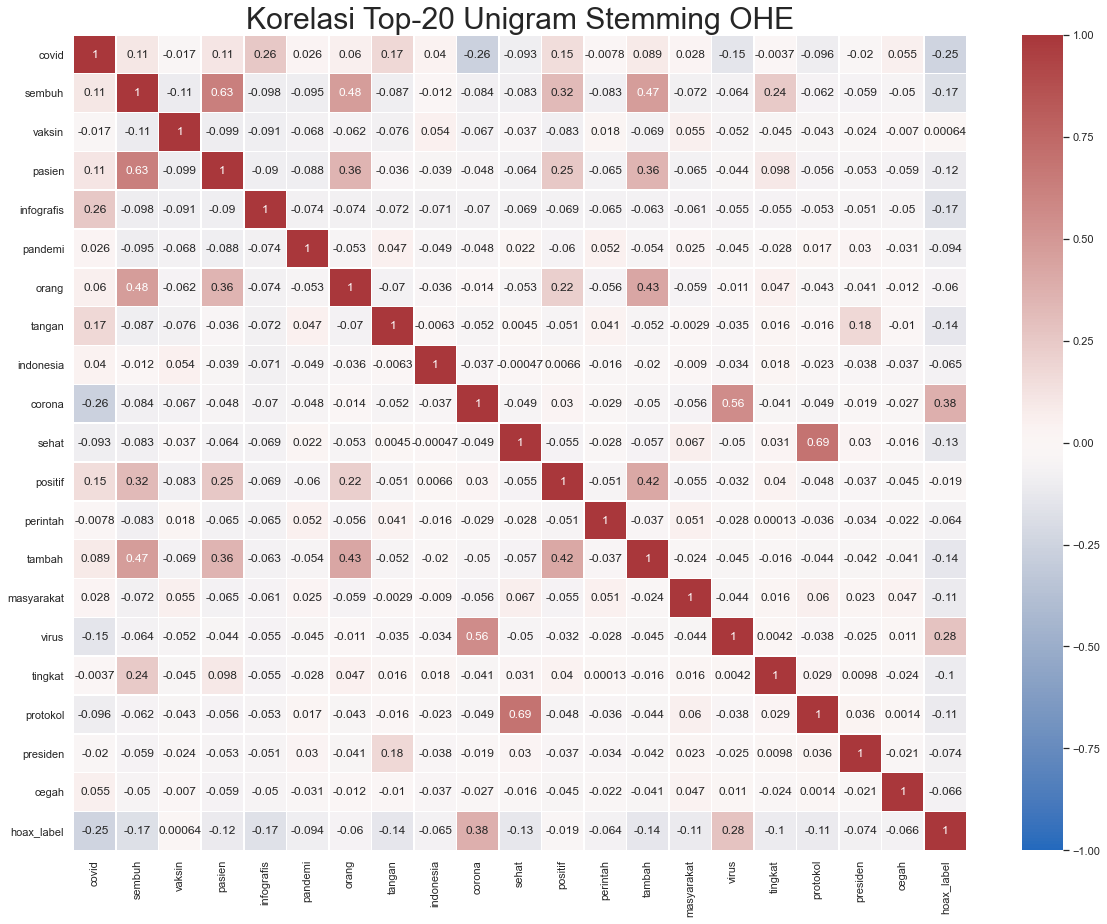

In [42]:
# Plot heatmap untuk top-20 unigram sampai tahap OHE
top_unigram_stem_col

korelasi_unigram = data_dtm_stem[top_unigram_stem_col]
korelasi_unigram['hoax_label'] = news['hoax']
sns.set(style="white")
plt.rcParams['figure.figsize'] = (20,15)
sns.heatmap(korelasi_unigram.corr(), annot=True, linewidths=.5, cmap='vlag', vmax=1, vmin=-1)
plt.title('Korelasi Top-20 Unigram Stemming OHE', fontsize = 30)
plt.show()

> Dari _heatmap_ terdapat tiga kata yang memiliki korelasi yang cukup mencolok. kata **corona** dan **virus** memiliki korelasi positif tertinggi, dan **covid** memiliki korelasi negatif tertinggi. Artinya, kemuculan kata **corona** dan **virus** memiliki pengaruh yang kuat dalam penentuan suatu berita tergolong _hoax_ atau bukan. Namun, sebaliknya untuk kata **covid**. Hal ini mungkin disebabkan kata **covid** banyak muncul dalam berita _hoax_ dan yang bukan, serta dari _unigram_, kata ini memang yang paling sering muncul dalam keseluruhan data.

## _Splitting Data_

Data yang sudah siap selanjutnya dibagi ke dalam data _training_ dan _testing_. Pembagian dilakukan dengan perbandingan 80:20. **x** merupakan data terakhir pada _step OHE_ dan **y** merupakan label _hoax_ pada berita terkait.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
news['hoax']

0       1
1       0
2       0
3       1
4       0
       ..
2491    0
2492    0
2493    0
2494    0
2495    0
Name: hoax, Length: 2496, dtype: int64

In [45]:
x_train, x_tes, y_train, y_tes = train_test_split(data_dtm_stem, news['hoax'], test_size=0.2)

In [46]:
news_stem.to_csv('news_stem.csv', index=False)

In [47]:
news.to_csv('news.csv', index=False)

# Klasifikasi dengan SVM

## Dengan _default_ Parameter

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       398
           1       0.73      0.96      0.83       102

    accuracy                           0.92       500
   macro avg       0.86      0.93      0.89       500
weighted avg       0.94      0.92      0.92       500

-------------------------------------------------
Akurasi: 0.918
Presisi: 0.9607843137254902
Recall: 0.725925925925926
F1-Score 0.8270042194092828
-------------------------------------------------


<AxesSubplot:>

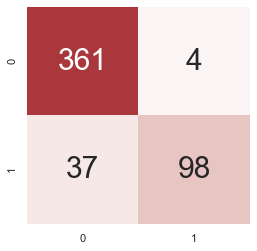

In [48]:
from sklearn import metrics
from sklearn import svm

modelsvm = svm.SVC() 
modelsvm.fit(x_train, y_train)
y_pred = modelsvm.predict(x_tes)

rep = metrics.classification_report(y_pred, y_tes)
print(rep)


print('-------------------------------------------------')
print('Akurasi:', metrics.accuracy_score(y_tes, y_pred))
print('Presisi:', metrics.precision_score(y_tes, y_pred))
print('Recall:', metrics.recall_score(y_tes, y_pred))
print('F1-Score', metrics.f1_score(y_tes, y_pred))
print('-------------------------------------------------')

matsvm = metrics.confusion_matrix(y_tes, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(matsvm, annot=True ,fmt='d',cbar=False, cmap='vlag',
            center=0, annot_kws={"size": 30})

## Dengan Parameter Hasil _Tuning_

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       391
           1       0.75      0.93      0.83       109

    accuracy                           0.92       500
   macro avg       0.86      0.92      0.89       500
weighted avg       0.93      0.92      0.92       500

-------------------------------------------------
Akurasi: 0.916
Presisi: 0.926605504587156
Recall: 0.7481481481481481
F1-Score 0.8278688524590164
-------------------------------------------------


<AxesSubplot:>

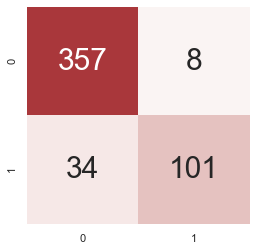

In [56]:
opt_svm = svm.SVC(C=2.5676806346305447, degree=5, gamma=0.08425467322725051, random_state=42)
# svm.SVC(kernel='rbf', C=27.00602245561593, degree=2, gamma=0.4967443507916002, random_state=42) 
#C=53.38896841987011, degree=3, gamma='scale', kernel='rbf')
opt_svm.fit(x_train, y_train)
y_pred_opt = opt_svm.predict(x_tes)

rep = metrics.classification_report(y_pred_opt, y_tes)
print(rep)

print('-------------------------------------------------')
print('Akurasi:', metrics.accuracy_score(y_tes, y_pred_opt))
print('Presisi:', metrics.precision_score(y_tes, y_pred_opt))
print('Recall:', metrics.recall_score(y_tes, y_pred_opt))
print('F1-Score', metrics.f1_score(y_tes, y_pred_opt))
print('-------------------------------------------------')

matsvm = metrics.confusion_matrix(y_tes, y_pred_opt)
plt.figure(figsize=(4,4))
sns.heatmap(matsvm, annot=True ,fmt='d',cbar=False, cmap='vlag',
            center=0, annot_kws={"size": 30})

## Analisa Hasil

&emsp;&emsp;&emsp;Hasil klasifikasi dengan _default_ menunjukkan akurasi yang cukup tinggi, mencapai **91,8%**. Namun, nilai presisi dan _recall_ memiiki selisih yang cukup besar, lebih dari **23,4%**. Ini mengakibatkan nilai _F1-Score_ hanya mencapai **82,7%**. Secara umum hasil klasifikasi hanya bekerja baik untuk berita non-_hoax_. Model belum dapat mengklasifikasikan berita _hoax_ dengan baik. Ini terlihat dari _Confusion Matrix_ bahwa terdapat 34 dari total 135 berita _hoax_ pada _testing data_ yang diklasifikasikan ke dalam berita non-_hoax_.  

&emsp;&emsp;&emsp;Karena hasil model dengan _default_ parameter belum memiliki performa yang kurang, dilakukan _tuning_ parameter menggunakan _Bayes Optimization_. Hasil parameternya yang diimplementasikan pada model, tidak menunjukkan peningkatan yang signifikan, namun selisih nilai presisi dan _recall_ menurun. Nilai akurasi dengan parameter hasil tuning turun sebesar **0,2%** dan nilai presisi turun sebesar **3,41%**. Di lain sisi, nilai _recall_, dan _F1-Score_ mengalami kenaikan. Selisih nilai presisi dan _recall_ berkurang menjadi **17,85%**. Hasil klasifikasi menjadi lebih seimbang. Hasil dari _confusion matrix_ menunjukkan adanya sedikit peningkatan dari model dalam mengklasifikasikan berita _hoax_, sebelumnya 98 meningkat menjadi 101 berita _hoax_ yang dapat diklasifikasikan dengan benar.  

&emsp;&emsp;&emsp;Model yang menggunakan parameter hasil tuning belum cukup baik dalam melakukan klasifikasi, namun hasilnya pengukuran dari metric yang digunakan menjadi lebih seimbang. Di awal, saat tahap eksplorasi keadaan kelas pada dataset memang menunjukkan keadaan yang tidak seimbang (_imbalance_) dan tidak dilakukan _treatment_ khusus untuk menangani masalah tersebut. Jadi, model dari SVM dengan _One Hot Encoding_ ini cukup baik.